In [1]:
import vice
import surp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import arya

modified solar abundances via mag++22


In [6]:
surp.yields.set_yields()

def sfh(tau=3):
    return lambda t: 5

tau_star = surp.simulation.multizone_sim.conroy_tau_star

def sz_model(eta=2, t_end=12,tau_star=tau_star, tau_sfh=1, dt=0.005):
    sz = vice.singlezone(elements=["o", "mg", "c", "fe"], dt=dt, eta=eta, 
                         func=sfh(tau=tau_sfh), mode="ifr", schmidt=False, 
                         tau_star=tau_star, Mg0=0)
    out = sz.run(np.arange(0, t_end, dt), capture=True, overwrite=True)
    return out

Yield settings
X       CC                            agb                           SN Ia
c       2.22e-03 + 5.51e-02 (Z - Z0)  1.32 × cristallo11            0
n       4.01e-04                      0.00e+00 M + 5.02e-04 M Z/Z0  6.43e-09
o       7.12e-03                      0                             0
mg      6.51e-04                      0                             0
fe      4.72e-04                      0                             6.69e-04




In [7]:
model_2 = sz_model()

/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


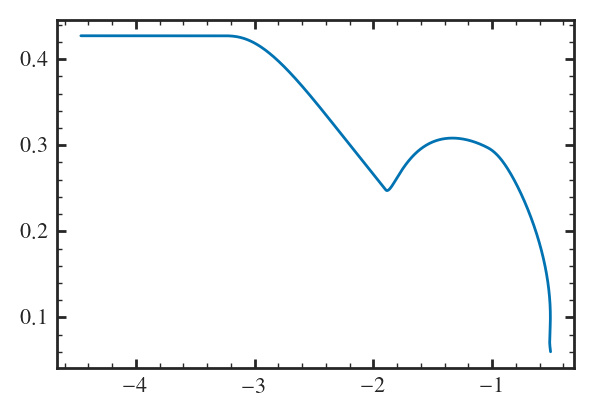

In [18]:
plt.plot(model.history["[fe/h]"], model.history["[o/fe]"])

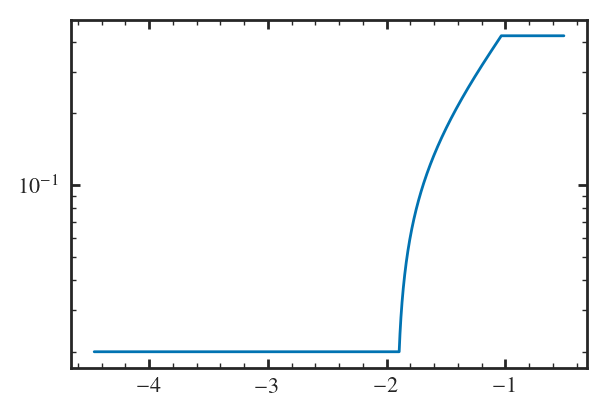

In [19]:
plt.plot(model.history["[fe/h]"], np.array(model.history["sfr"])/np.array(model.history["mgas"])*1e9)
plt.yscale("log")

In [20]:
8**2-7**2

15

In [9]:
surp.yields.set_yields()

def sfh(tau=3):
    return lambda t: 5

tau_star = surp.simulation.multizone_sim.conroy_sf_law((3.14*15))

def sz_model(eta=2, t_end=12,tau_star=tau_star, tau_sfh=1, dt=0.005):
    sz = vice.singlezone(elements=["o", "mg", "c", "fe"], dt=dt, eta=eta, 
                         func=sfh(tau=tau_sfh), mode="ifr", schmidt=True, 
                         tau_star=tau_star, Mg0=0)
    out = sz.run(np.arange(0, t_end, dt), capture=True, overwrite=True)
    return out

Yield settings
X       CC                            agb                           SN Ia
c       2.22e-03 + 5.51e-02 (Z - Z0)  1.32 × cristallo11            0
n       4.01e-04                      0.00e+00 M + 5.02e-04 M Z/Z0  6.43e-09
o       7.12e-03                      0                             0
mg      6.51e-04                      0                             0
fe      4.72e-04                      0                             6.69e-04




In [10]:
model = sz_model()

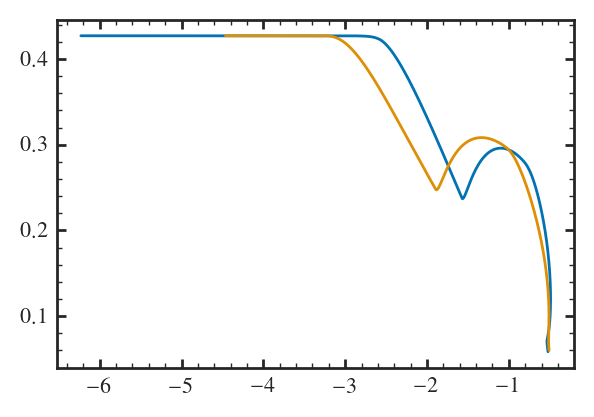

In [11]:
plt.plot(model.history["[fe/h]"], model.history["[o/fe]"])
plt.plot(model_2.history["[fe/h]"], model_2.history["[o/fe]"])

In [ ]:
plt.plot(model.history["[fe/h]"], np.array(model.history["sfr"])/np.array(model.history["mgas"])*1e9)
plt.yscale("log")